## Importing  In built Functions & Libraries 

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.linalg import svd

## Reading the data

In [147]:
data=pd.read_csv(r"C:\Users\anant\Desktop\reviews.csv")

In [148]:
data.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,"December 17, 2012",147643103,False
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,"December 17, 2012",147639004,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,"December 18, 2012",147697954,False
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,"December 17, 2012",147625723,False
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,"December 17, 2012",147612823,False


## Data Pre-Processing

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ratings            10000 non-null  object
 1   title              10000 non-null  object
 2   text               10000 non-null  object
 3   author             10000 non-null  object
 4   date_stayed        9757 non-null   object
 5   offering_id        10000 non-null  int64 
 6   num_helpful_votes  10000 non-null  int64 
 7   date               10000 non-null  object
 8   id                 10000 non-null  int64 
 9   via_mobile         10000 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 713.0+ KB


In [150]:
df=data[["id","ratings"]]

In [151]:
df.head()

,id,ratings
0,147643103,"{'service': 5.0, 'cleanliness': 5.0, 'overall'..."
1,147639004,"{'service': 5.0, 'cleanliness': 5.0, 'overall'..."
2,147697954,"{'service': 4.0, 'cleanliness': 5.0, 'overall'..."
3,147625723,"{'service': 5.0, 'cleanliness': 5.0, 'overall'..."
4,147612823,"{'service': 4.0, 'cleanliness': 5.0, 'overall'..."


## Splitting the column Ratings 

In [152]:
#Abstract Syntax Trees
import ast
df['ratings'] = df['ratings'].apply(ast.literal_eval)
df = pd.concat([df.drop(['ratings'], axis=1), pd.json_normalize(df['ratings'])], axis=1)

C:\Users\anant\AppData\Local\Temp\ipykernel_6024\2506144524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratings'] = df['ratings'].apply(ast.literal_eval)


In [153]:
df.head()

,id,service,cleanliness,overall,value,location,sleep_quality,rooms,check_in_front_desk,business_service_(e_g_internet_access)
0,147643103,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
1,147639004,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
2,147697954,4.0,5.0,4.0,4.0,5.0,4.0,4.0,NaN,NaN
3,147625723,5.0,5.0,4.0,5.0,5.0,5.0,5.0,NaN,NaN
4,147612823,4.0,5.0,4.0,3.0,5.0,5.0,5.0,NaN,NaN


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      10000 non-null  int64  
 1   service                                 9231 non-null   float64
 2   cleanliness                             9207 non-null   float64
 3   overall                                 10000 non-null  float64
 4   value                                   9177 non-null   float64
 5   location                                8330 non-null   float64
 6   sleep_quality                           7110 non-null   float64
 7   rooms                                   8524 non-null   float64
 8   check_in_front_desk                     638 non-null    float64
 9   business_service_(e_g_internet_access)  494 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


In [155]:
df=df[["id","service","cleanliness","location","sleep_quality","rooms","overall"]]

In [156]:
df.head()

,id,service,cleanliness,location,sleep_quality,rooms,overall
0,147643103,5.0,5.0,5.0,5.0,5.0,5.0
1,147639004,5.0,5.0,5.0,5.0,5.0,5.0
2,147697954,4.0,5.0,5.0,4.0,4.0,4.0
3,147625723,5.0,5.0,5.0,5.0,5.0,4.0
4,147612823,4.0,5.0,5.0,5.0,5.0,4.0


In [157]:
df.columns

Index(['id', 'service', 'cleanliness', 'location', 'sleep_quality', 'rooms',
       'overall'],
      dtype='object')

In [158]:
df.shape

(10000, 7)

In [159]:
ratings = df.drop(["id", "overall"], axis=1)
overall_ratings = df["overall"]

In [160]:
ratings.columns

Index(['service', 'cleanliness', 'location', 'sleep_quality', 'rooms'], dtype='object')

### Check for missing values (NaN) and fill them with 0

In [161]:
ratings.fillna(0, inplace=True)

### Convert the DataFrame to Float

In [162]:
 ratings = ratings.astype(float)

In [165]:
cluster_results = {}
k_values = range(2, 13)
k_distance_values = []  
for k in k_values:
    kmeans = KMeans(n_clusters=k) 
    cluster_labels = kmeans.fit_predict(ratings)      
    k_distance_values.append(kmeans.inertia_)    
    cluster_results[k] = cluster_labels   

C:\Users\anant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anant\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [130]:
optimal_k = None
min_inertia_diff = float('inf')
for i in range(1, len(k_distance_values)):
    inertia_diff = k_distance_values[i - 1] - k_distance_values[i]
    if inertia_diff < min_inertia_diff:
        min_inertia_diff = inertia_diff
        optimal_k = k_values[i]
print(f"Optimal number of clusters (k) using the elbow method: {optimal_k}")

Optimal number of clusters (k) using the elbow method: 12


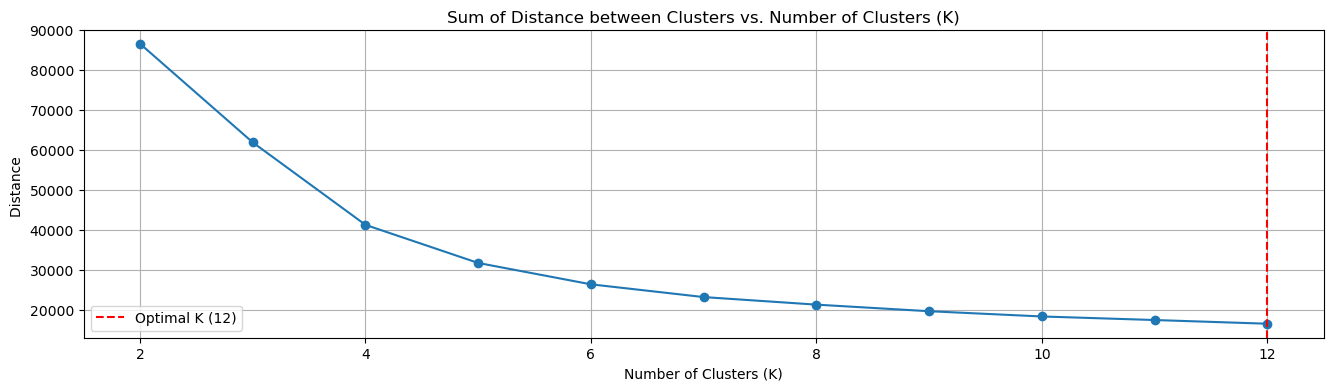

In [166]:
plt.figure(figsize=(16, 4))
plt.plot(k_values, k_distance_values, marker='o')
plt.title('Sum of Distance between Clusters vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distance ')
plt.grid(True)
#plot optimal k value on the graph 
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K ({optimal_k})')
plt.legend()
plt.show()

# Dimensionality Reduction 

In [141]:
for cluster_label in range(optimal_k):
    cluster_data = ratings[cluster_labels == cluster_label]
    U, S, V = svd(cluster_data)
    print("Shape of U Matrix :", U.shape)
    print("Shape of S Matrix :", S.shape)
    print("Shape of VT Matrix :", V.shape)
    reduced_data = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), V[:rank, :]))
    print(f"Reduced data for cluster {cluster_label} (optimal_k={optimal_k}):")
    print(reduced_data.shape)
    print()

Shape of U Matrix : (695, 695)
Shape of S Matrix : (5,)
Shape of VT Matrix : (5, 5)
Reduced data for cluster 0 (optimal_k=12):
(695, 5)

Shape of U Matrix : (736, 736)
Shape of S Matrix : (5,)
Shape of VT Matrix : (5, 5)
Reduced data for cluster 1 (optimal_k=12):
(736, 5)

Shape of U Matrix : (3468, 3468)
Shape of S Matrix : (5,)
Shape of VT Matrix : (5, 5)
Reduced data for cluster 2 (optimal_k=12):
(3468, 5)

Shape of U Matrix : (1013, 1013)
Shape of S Matrix : (5,)
Shape of VT Matrix : (5, 5)
Reduced data for cluster 3 (optimal_k=12):
(1013, 5)

Shape of U Matrix : (715, 715)
Shape of S Matrix : (5,)
Shape of VT Matrix : (5, 5)
Reduced data for cluster 4 (optimal_k=12):
(715, 5)

Shape of U Matrix : (630, 630)
Shape of S Matrix : (5,)
Shape of VT Matrix : (5, 5)
Reduced data for cluster 5 (optimal_k=12):
(630, 5)

Shape of U Matrix : (420, 420)
Shape of S Matrix : (5,)
Shape of VT Matrix : (5, 5)
Reduced data for cluster 6 (optimal_k=12):
(420, 5)

Shape of U Matrix : (454, 454)
Shap